In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import missingno as msno
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D208 Regression Analysis/churn_clean.csv")

In [3]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data.shape)


duplicates = churned_data.duplicated(keep = False)
duplicates.value_counts()

(10000, 50)


False    10000
dtype: int64

In [4]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data.isna().sum()
#churned_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

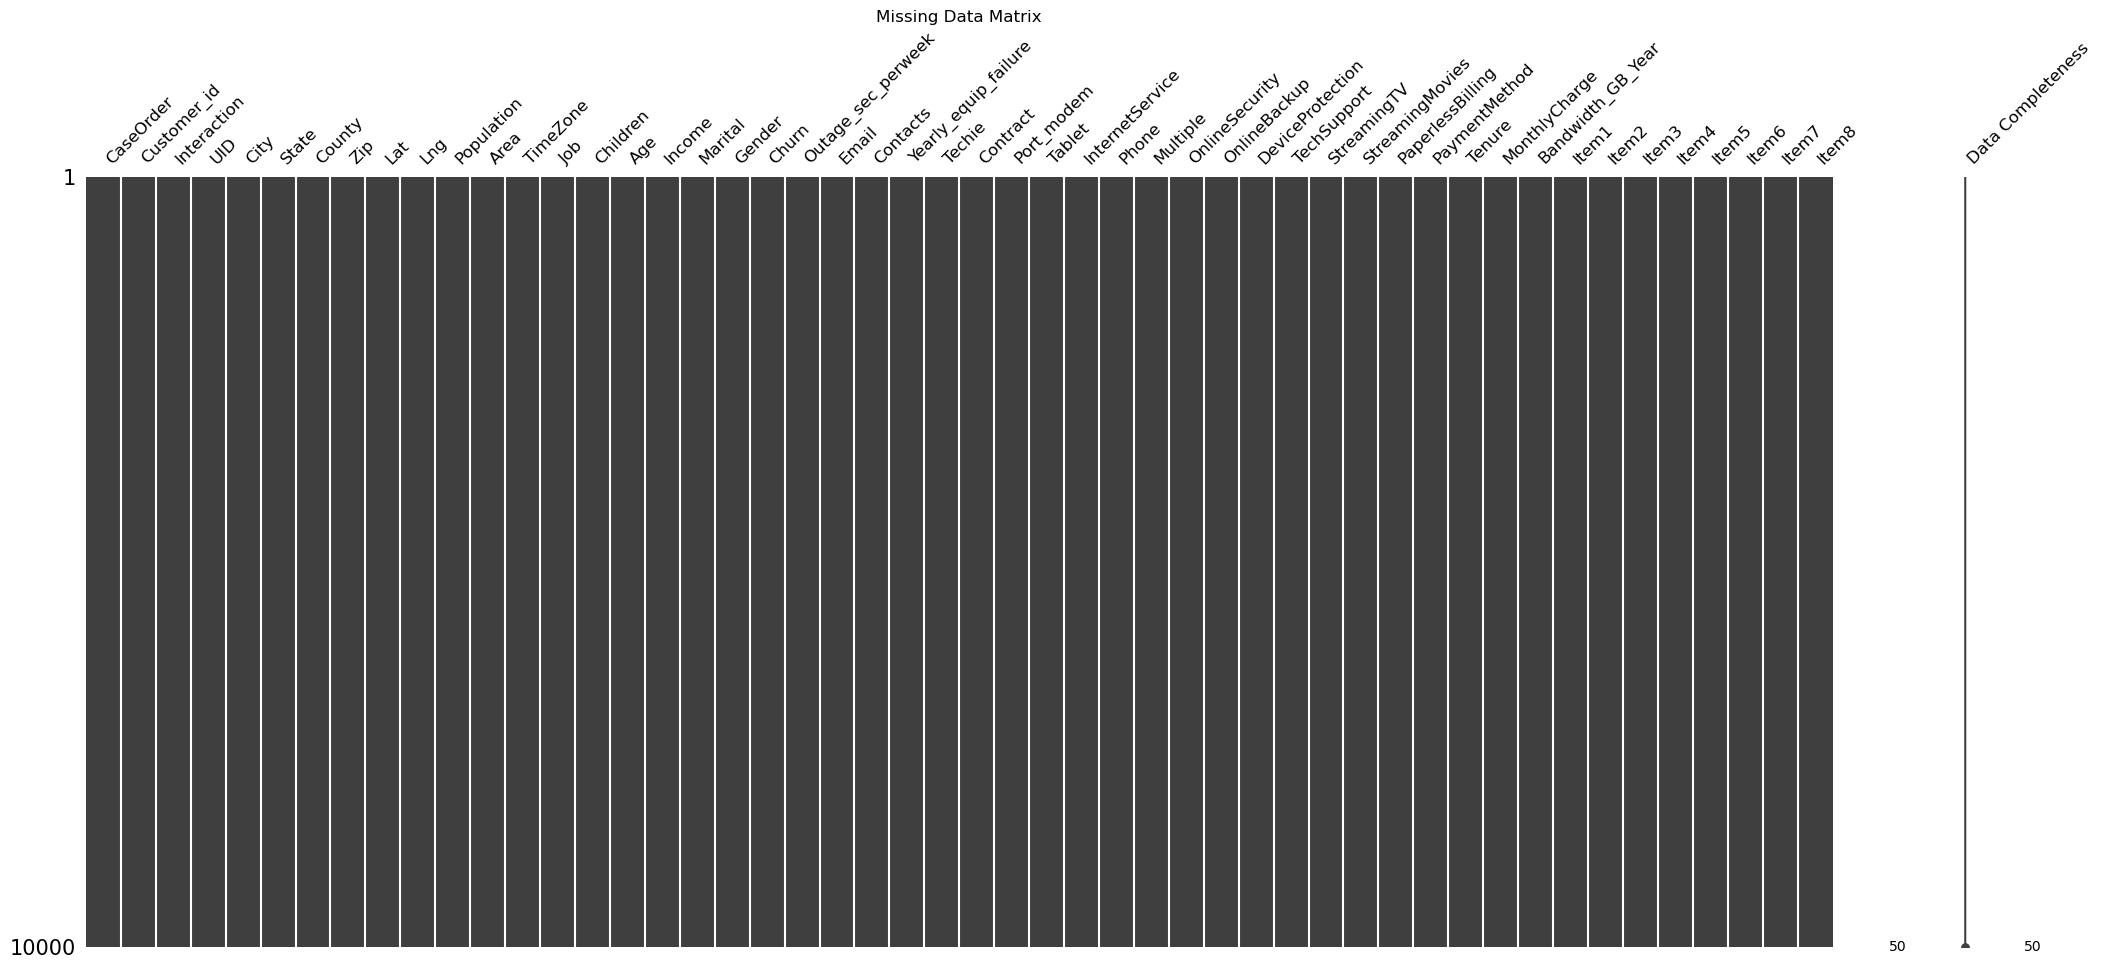

In [5]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [ ]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

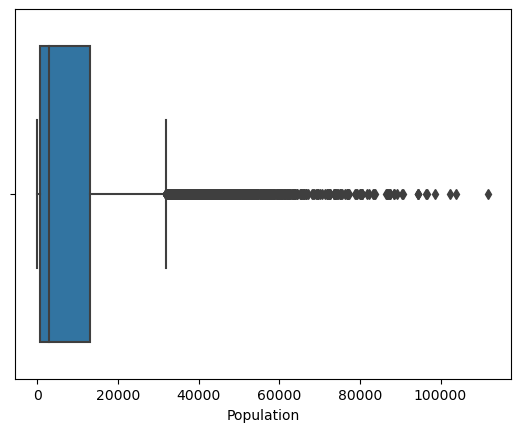

In [6]:
boxplot_population = seaborn.boxplot(x = "Population", data = churned_data)


In [ ]:
## Choosing to retain outliers

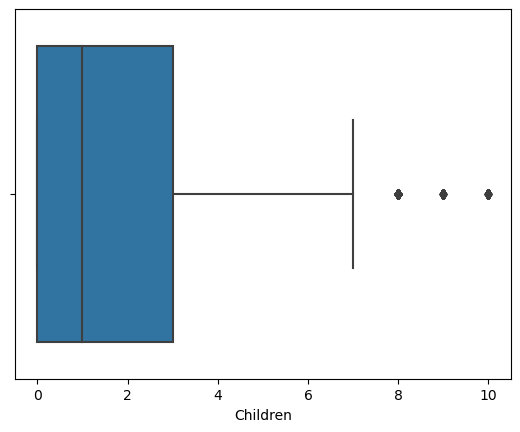

In [7]:
boxplot_Children = seaborn.boxplot(x = "Children", data = churned_data)

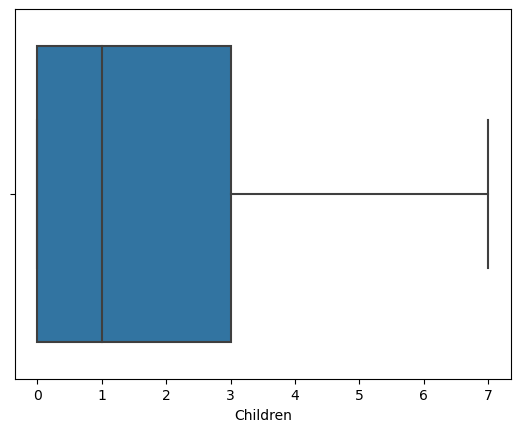

In [8]:
## Removing the  instances outlier and rechecking the plot
Children_outliers = churned_data[ (churned_data["Children"] > 7)]

churned_data.drop(churned_data[ (churned_data["Children"] > 7)].index, inplace = True )
Children_removed_outliers = seaborn.boxplot(x = "Children", data = churned_data)

In [ ]:
## No more outliers detected for Children

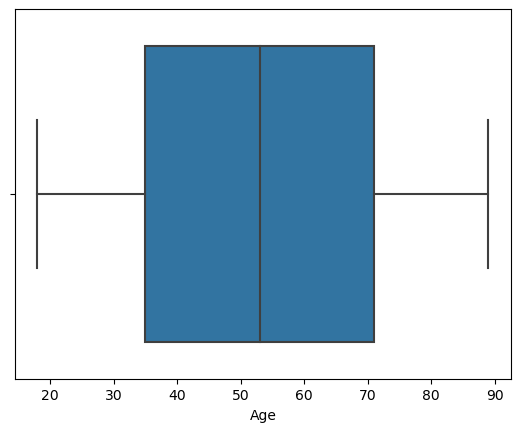

In [9]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data)

In [ ]:
## No outliers detected for Age

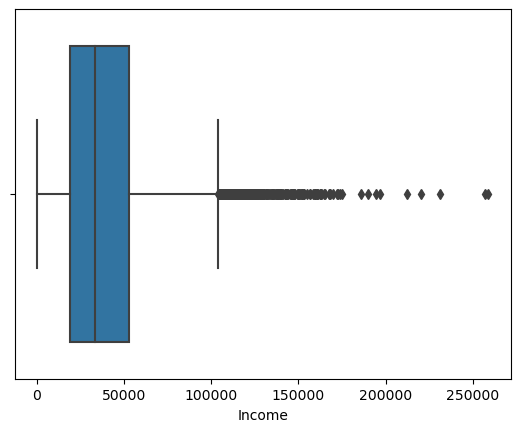

In [10]:
boxplot_Income = seaborn.boxplot(x = "Income", data = churned_data)

19268.980000000003 53141.83
33872.85
-31540.29499999999 103951.105


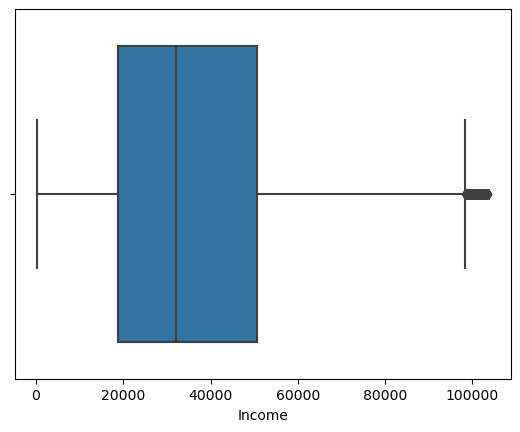

In [11]:
## Re-using my code that I created for D206, I will find the quartile ranges and then drop the necessary values. 

Income_q1, Income_q3 = np.percentile(churned_data["Income"], [25,75])
print(Income_q1, Income_q3)

Income_iqr = Income_q3 - Income_q1
print(Income_iqr)

Income_lower_limit = Income_q1 - (1.5*Income_iqr)
Income_upper_limit = Income_q3 + (1.5*Income_iqr)
print(Income_lower_limit, Income_upper_limit)

## Removing the  instances outlier and rechecking the plot
Income_outliers = churned_data[ (churned_data["Income"] > Income_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Income"] > Income_upper_limit)].index, inplace = True )
Income_removed_outliers = seaborn.boxplot(x = "Income", data = churned_data)

In [ ]:
## Going to RETAIN the outliers as there is depreciating returns on the continued reduction of the sample size

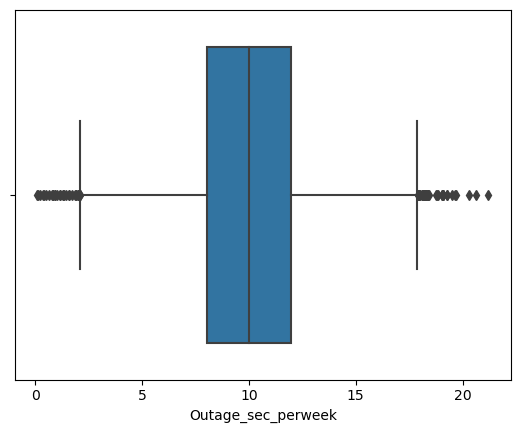

In [12]:
boxplot_Outage = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

8.024894 11.97165632
3.9467623199999995
2.1047505200000005 17.891799799999998


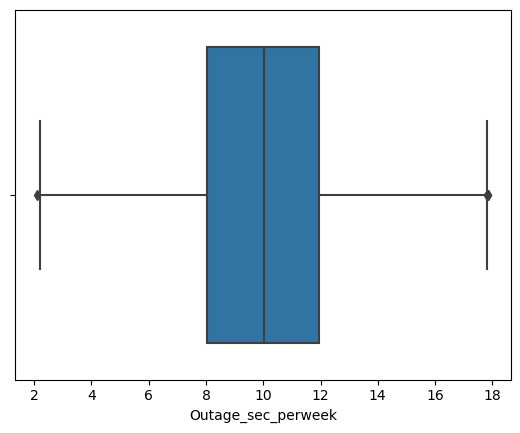

In [13]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Outage_q1, Outage_q3 = np.percentile(churned_data["Outage_sec_perweek"], [25,75])
print(Outage_q1, Outage_q3)

Outage_iqr = Outage_q3 - Outage_q1
print(Outage_iqr)

Outage_lower_limit = Outage_q1 - (1.5*Outage_iqr)
Outage_upper_limit = Outage_q3 + (1.5*Outage_iqr)
print(Outage_lower_limit, Outage_upper_limit)

## Removing the values < 0
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < 0)].index, inplace = True )

## Removing the  instances outlier and rechecking the plot
Outage_sec_perweek_outliers = churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)]
Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])
#Outage_sec_perweek_outliers.info()

churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < Outage_lower_limit)].index, inplace = True )

Outage_sec_perweek_removed_outliers = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

In [ ]:
## Going to RETAIN the couple of straggling outliers since they are so close to the data

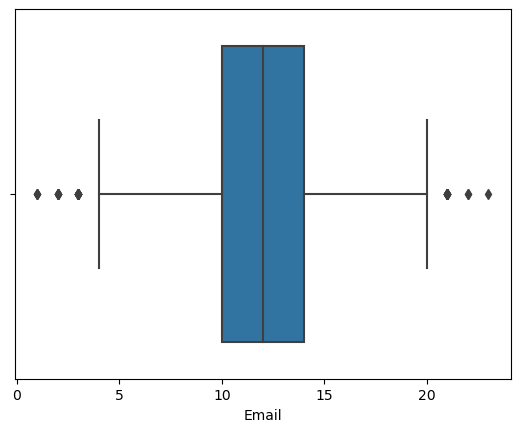

In [14]:
boxplot_Email = seaborn.boxplot(x = "Email", data = churned_data)

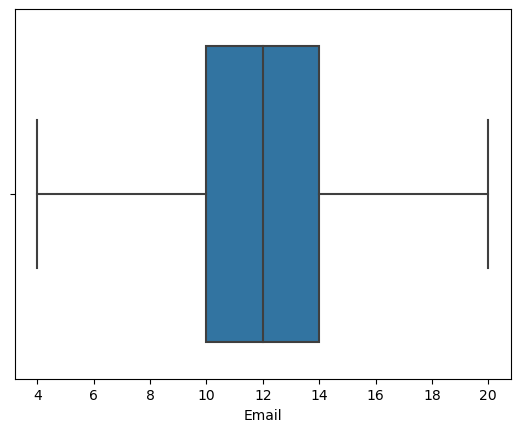

In [15]:
## Removing the  instances outlier and rechecking the plot
Email_outliers = churned_data[ (churned_data["Email"] > 20)]
Email_outliers.append(churned_data[(churned_data["Email"] < 4)])

#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Email"] > 20)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Email"] < 4)].index, inplace = True )
Email_removed_outliers = seaborn.boxplot(x = "Email", data = churned_data)

In [ ]:
## No more outliers detected for Email

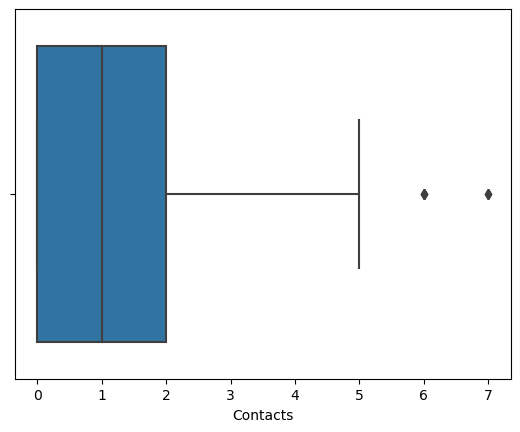

In [16]:
boxplot_Contacts = seaborn.boxplot(x = "Contacts", data = churned_data)

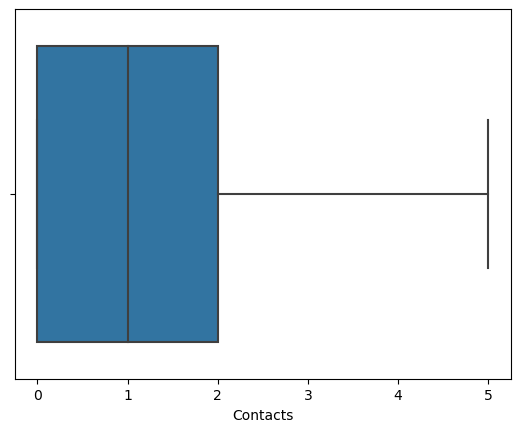

In [17]:
## Removing the  instances outlier and rechecking the plot
Contacts_outliers = churned_data[ (churned_data["Contacts"] > 5)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Contacts"] > 5)].index, inplace = True )
Contacts_removed_outliers = seaborn.boxplot(x = "Contacts", data = churned_data)

In [ ]:
## No more outliers detected for Contacts

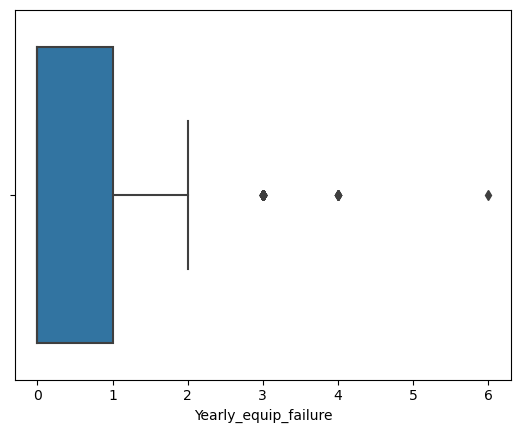

In [18]:
boxplot_Yearly_equip_failure = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

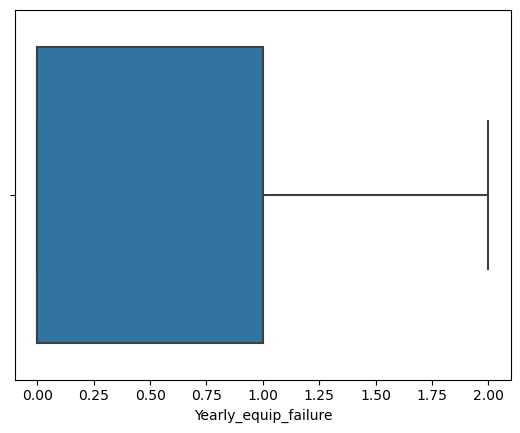

In [19]:
Yearly_equip_failure_outliers = churned_data[ (churned_data["Yearly_equip_failure"] > 2)]
#Yearly_equip_failure_outliers.info()

churned_data.drop(churned_data[ (churned_data["Yearly_equip_failure"] > 2)].index, inplace = True )
Yearly_equip_failure_removed_outliers = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

In [ ]:
## No more outliers detected for Yearly_equip_failure

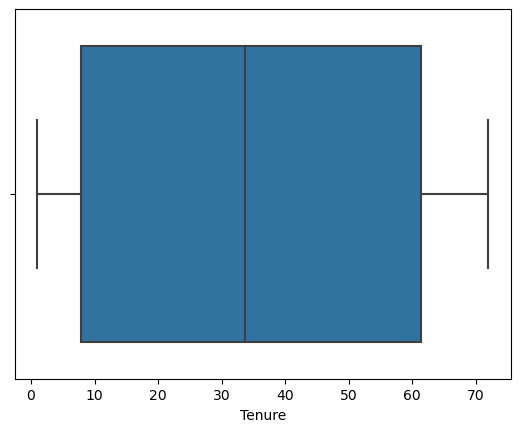

In [20]:
boxplot_Tenure = seaborn.boxplot(x = "Tenure", data = churned_data)

In [ ]:
## No outliers detected for Tenure

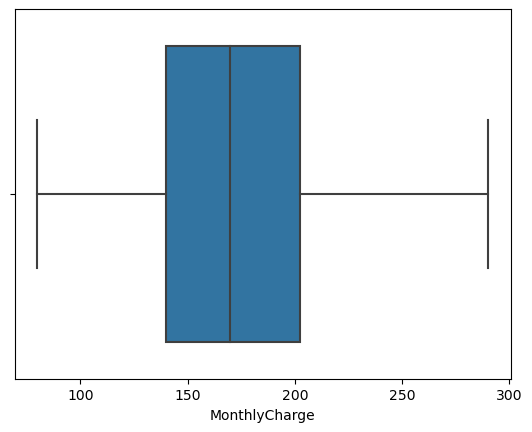

In [21]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)

In [ ]:
## No outliers detected for MonthlyCharge

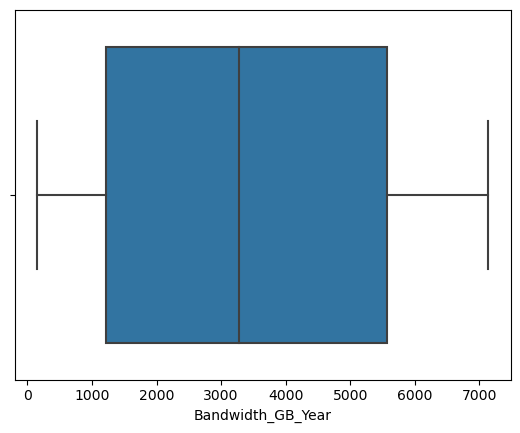

In [22]:
boxplot_Bandwidth_GB_Year = seaborn.boxplot(x = "Bandwidth_GB_Year", data = churned_data)

In [ ]:
## No outliers detected for Bandwidth_GB_Year

In [23]:
churned_data.shape

(9079, 50)

In [24]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my regression.
## I want to use all of the quantitative variables and some of the Yes/No response columns I found interesting. Since I used the other
## categorical variables in D207. I believe that will give 
## me 15 explanatory variables to use in the regression. Techie, Multiple, StreamingTV, TechSupport, OnlineSecurity are the categorical variables I will look at

churned_data_linear = churned_data.drop(columns = ['CaseOrder', 'Customer_id','Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job',
                                                   'Marital', 'Gender', 'Churn', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
                                                   'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
                                                  'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [25]:
## Checking the new data set. I left the CaseOrder and Customer_Id just to be able to revert if necessary
## or to check on a specific customer without any data loss. Should have 18 columns now.
churned_data_linear.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Multiple,OnlineSecurity,TechSupport,StreamingTV,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,No,No,Yes,No,No,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,Yes,Yes,Yes,No,Yes,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,Yes,Yes,No,No,No,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,Yes,No,Yes,No,Yes,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,No,No,No,Yes,Yes,1.670972,149.948316,271.493436


In [26]:
## Getting a list of all of the columns names except for the CaseOrder and Customer_id

column_headers = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Tenure', 'Bandwidth_GB_Year']
churned_cont =['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'MonthlyCharge', 'Tenure', 'Bandwidth_GB_Year']
churned_cat = ['Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV',]
print("The Column Header :", column_headers)

The Column Header : ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Tenure', 'Bandwidth_GB_Year']


In [27]:
count, unique, top, freq = churned_data_linear['Techie'].describe()
print(count, unique, top, freq)

9079 2 No 7563


In [28]:
## Getting the summary statistics for each categorical variable

for i in range (0, len(churned_cat)):
    count, unique, top, freq = churned_data_linear[churned_cat[i]].describe()
    print("Descriptive statistics for ", churned_cat[i], '\n', churned_data_linear[churned_cat[i]].describe(), '\n')
    print("The overall proportion of responses is ", round((freq/count)*100, 2),"%", top, '\n')
    


Descriptive statistics for  Techie 
 count     9079
unique       2
top         No
freq      7563
Name: Techie, dtype: object 

The overall proportion of responses is  83.3 % No 

Descriptive statistics for  Multiple 
 count     9079
unique       2
top         No
freq      4881
Name: Multiple, dtype: object 

The overall proportion of responses is  53.76 % No 

Descriptive statistics for  OnlineSecurity 
 count     9079
unique       2
top         No
freq      5830
Name: OnlineSecurity, dtype: object 

The overall proportion of responses is  64.21 % No 

Descriptive statistics for  TechSupport 
 count     9079
unique       2
top         No
freq      5694
Name: TechSupport, dtype: object 

The overall proportion of responses is  62.72 % No 

Descriptive statistics for  StreamingTV 
 count     9079
unique       2
top         No
freq      4604
Name: StreamingTV, dtype: object 

The overall proportion of responses is  50.71 % No 



In [29]:
## Getting the summary statistics for each continuous variable

for i in range (0, len(churned_cont)):
    print("Descriptive statistics for ", churned_cont[i], '\n', churned_data_linear[churned_cont[i]].describe(), '\n')
    


Descriptive statistics for  Population 
 count      9079.000000
mean       9761.602269
std       14434.479659
min           0.000000
25%         745.000000
50%        2889.000000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64 

Descriptive statistics for  Children 
 count    9079.000000
mean        1.810992
std         1.695791
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64 

Descriptive statistics for  Age 
 count    9079.000000
mean       53.210376
std        20.668749
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64 

Descriptive statistics for  Income 
 count      9079.000000
mean      36742.304085
std       22857.868877
min         348.670000
25%       18843.450000
50%       32125.500000
75%       50558.085000
max      103625.100000
Name: Income, dtype: float64 

Descriptive statis

Univariate plot for  Population 



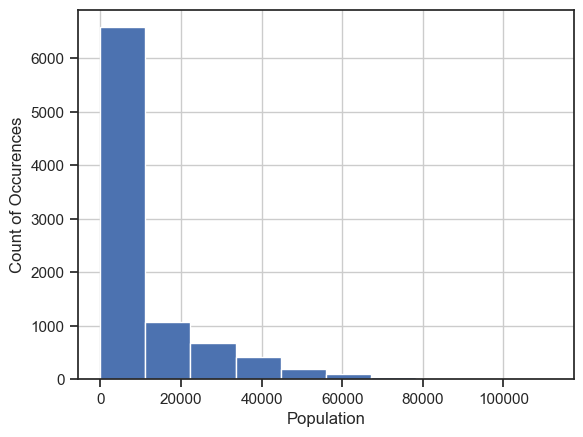

Univariate plot for  Children 



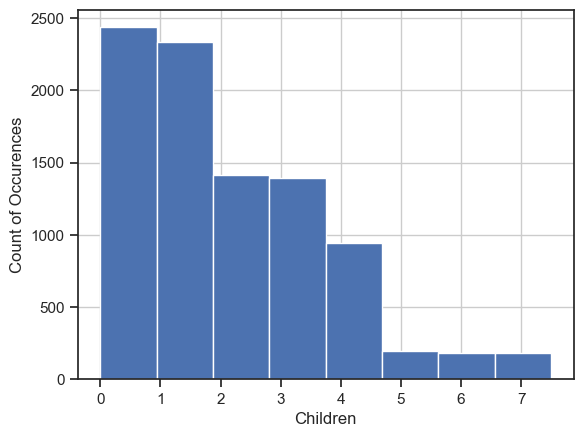

Univariate plot for  Age 



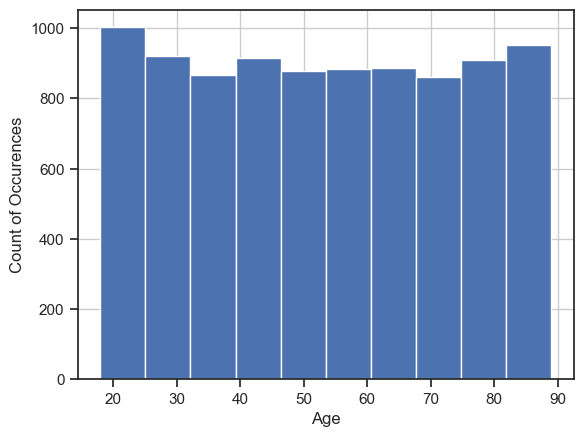

Univariate plot for  Income 



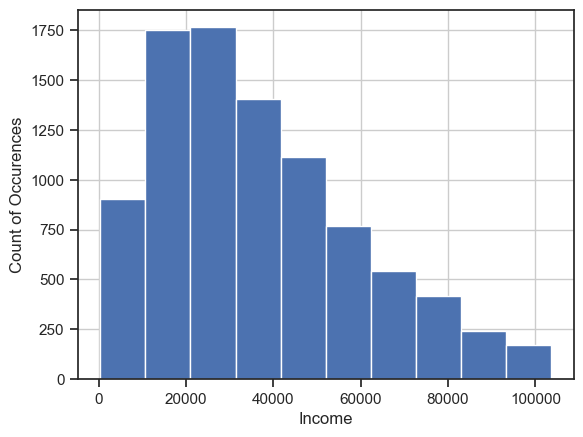

Univariate plot for  Outage_sec_perweek 



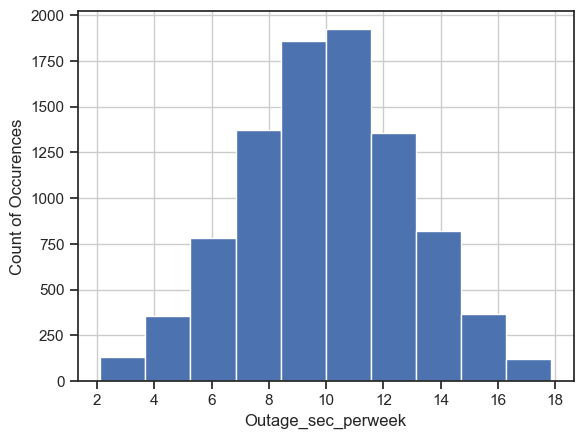

Univariate plot for  Contacts 



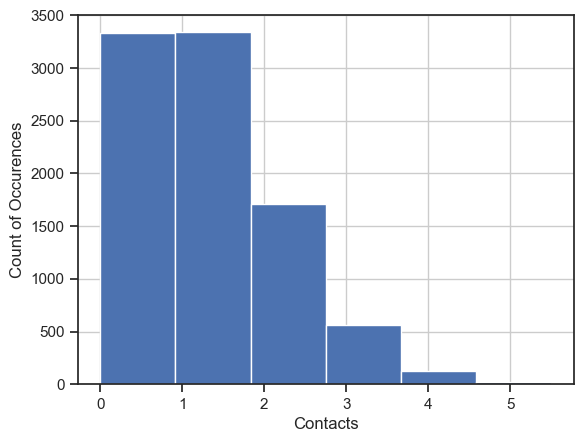

Univariate plot for  Email 



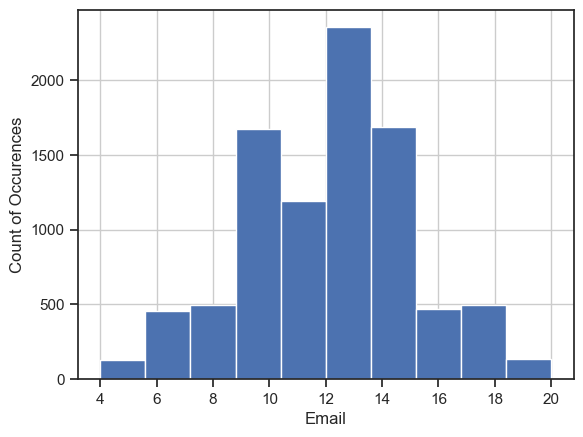

Univariate plot for  Yearly_equip_failure 



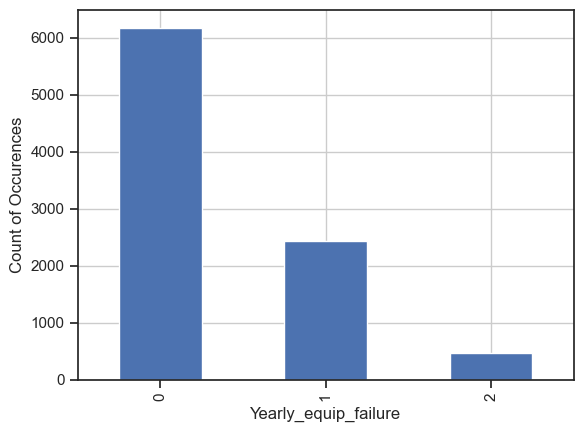

Univariate plot for  Techie 



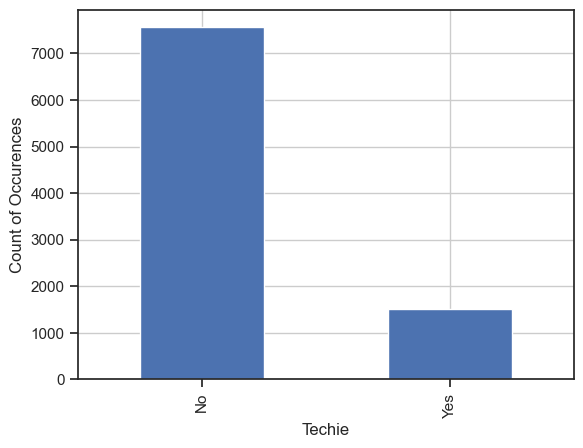

Univariate plot for  Multiple 



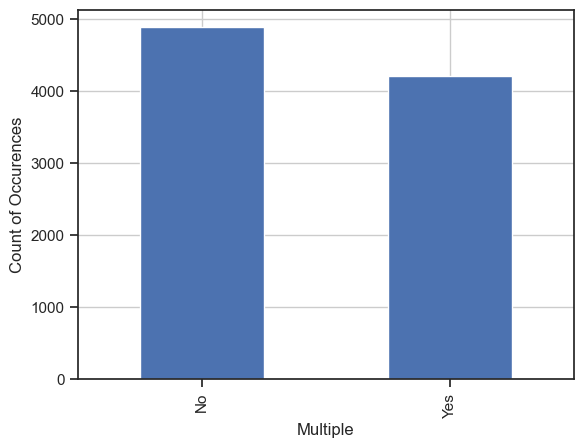

Univariate plot for  OnlineSecurity 



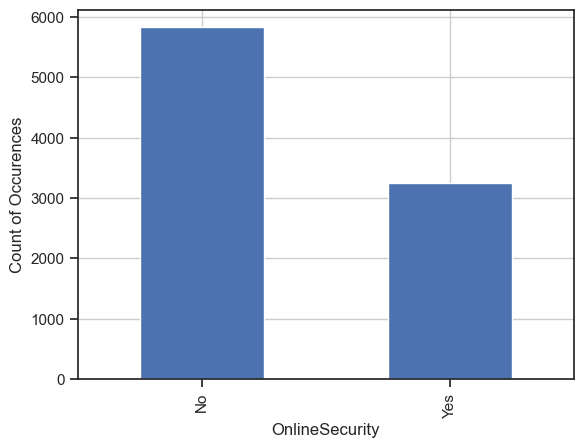

Univariate plot for  TechSupport 



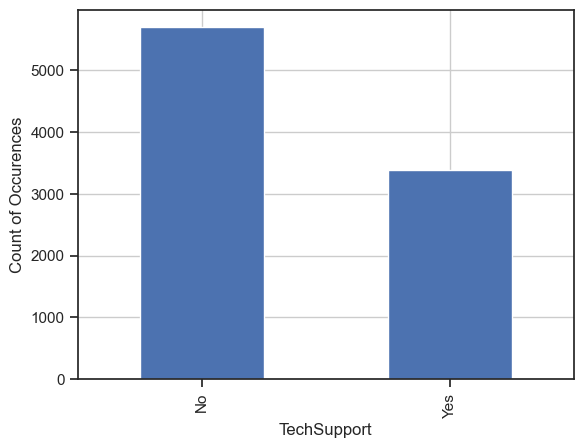

Univariate plot for  MonthlyCharge 



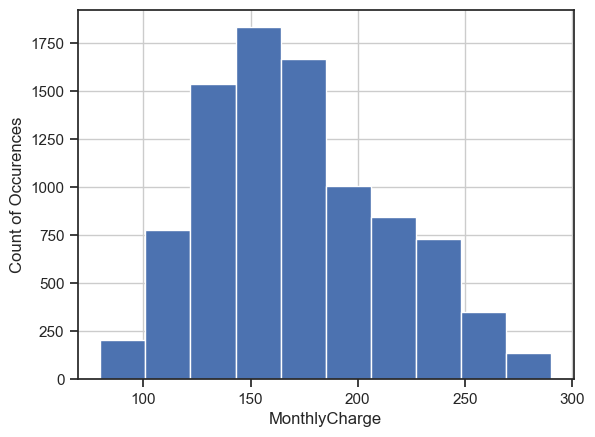

Univariate plot for  StreamingTV 



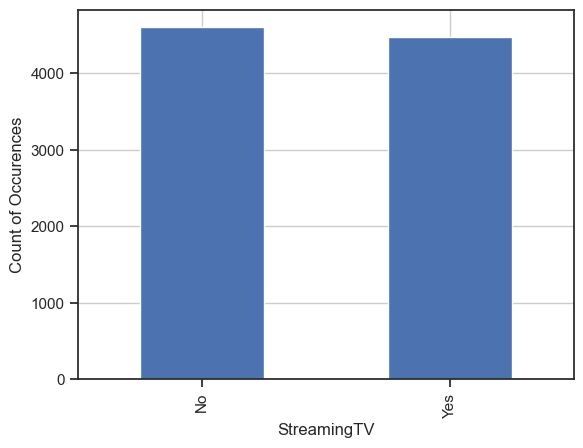

Univariate plot for  Tenure 



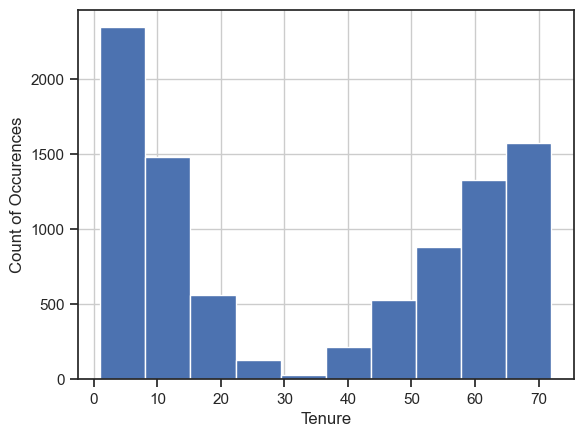

Univariate plot for  Bandwidth_GB_Year 



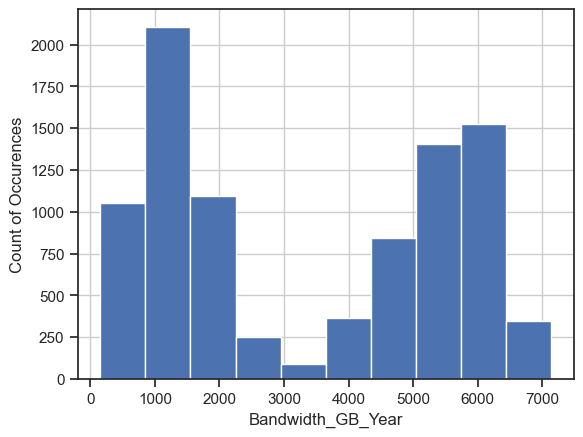

In [30]:
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
seaborn.set_style("darkgrid")
seaborn.set(style="ticks")
for i in range(0, len(column_headers)):
    print("Univariate plot for ", column_headers[i], '\n')
    if churned_data_linear[column_headers[i]].nunique() > 3 and churned_data_linear[column_headers[i]].nunique() < 10:
        plt.hist(churned_data_linear[column_headers[i]], 
                 bins = churned_data_linear[column_headers[i]].nunique(), 
                 range = (churned_data_linear[column_headers[i]].min(), (churned_data_linear[column_headers[i]].max() + 0.5)))
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    elif churned_data_linear[column_headers[i]].nunique() < 4:
        churned_data_linear[column_headers[i]].value_counts().plot(kind = 'bar')
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    
    else:
        plt.hist(churned_data_linear[column_headers[i]])
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()

In [31]:
## Creating variables that are lists of each categorical and quantitative variable

churned_cont = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV']


Bivariate plot for Tenure and Population


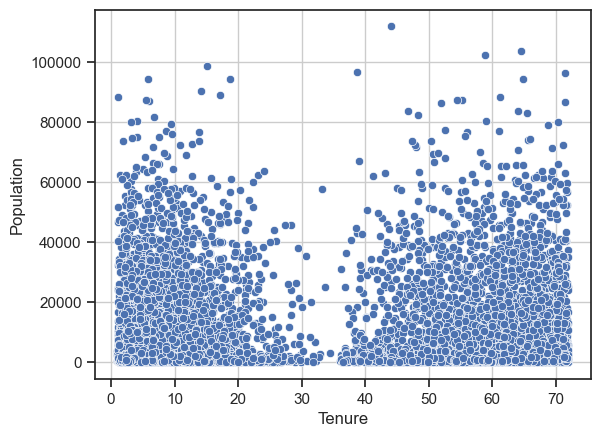

In [32]:
## Plotting the scatterplots for the continuous variables 
print("Bivariate plot for Tenure and Population")
seaborn.scatterplot(x = "Tenure", y = "Population",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Children


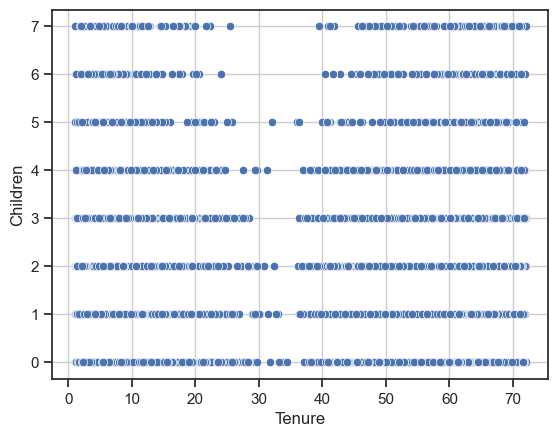

In [33]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Children")
seaborn.scatterplot(x = "Tenure", y = "Children",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Age


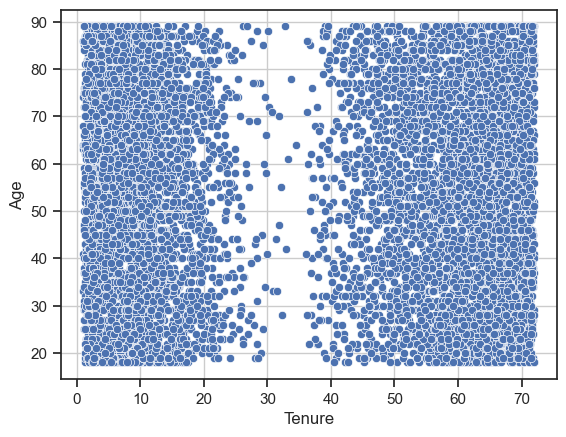

In [34]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Age")
seaborn.scatterplot(x = "Tenure", y = "Age",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Income


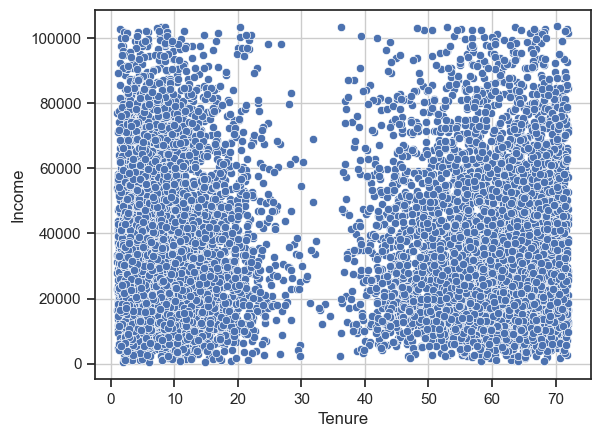

In [35]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Income")
seaborn.scatterplot(x = "Tenure", y = "Income",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Outage_sec_perweek


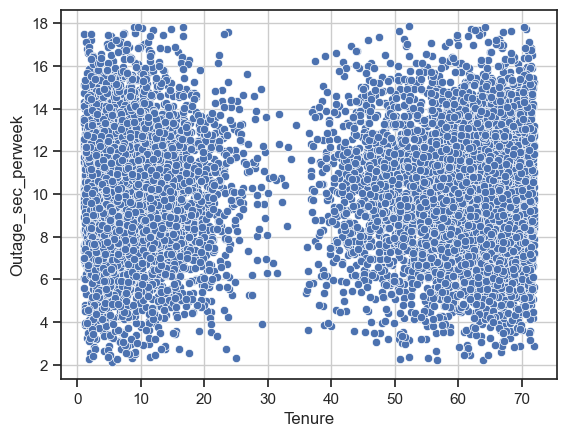

In [36]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Outage_sec_perweek")
seaborn.scatterplot(x = "Tenure", y = "Outage_sec_perweek",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Contacts


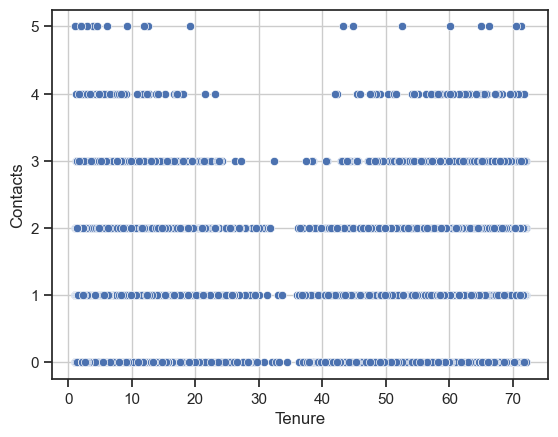

In [37]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Contacts")
seaborn.scatterplot(x = "Tenure", y = "Contacts",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Email


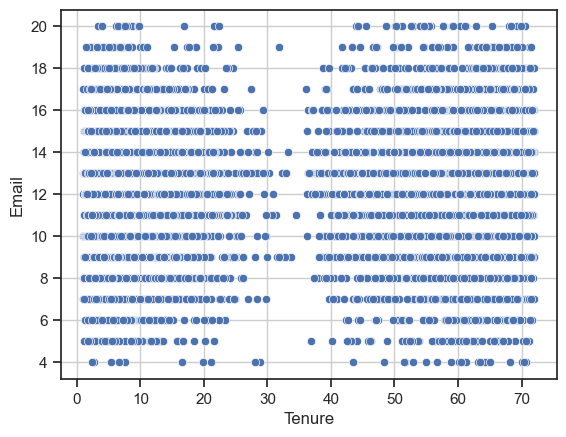

In [38]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Email")
seaborn.scatterplot(x = "Tenure", y = "Email",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Yearly_equip_failure


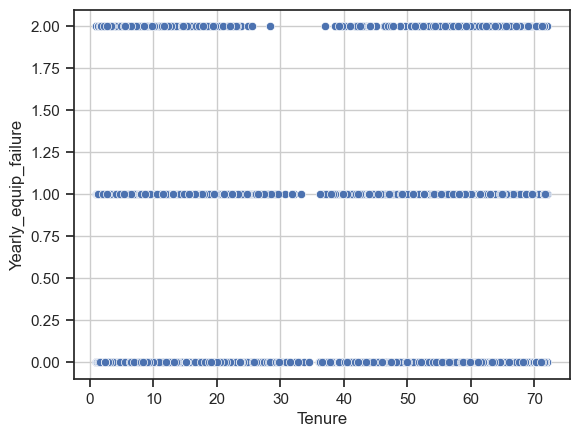

In [39]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Yearly_equip_failure")
seaborn.scatterplot(x = "Tenure", y = "Yearly_equip_failure",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Bandwidth_GB_Year


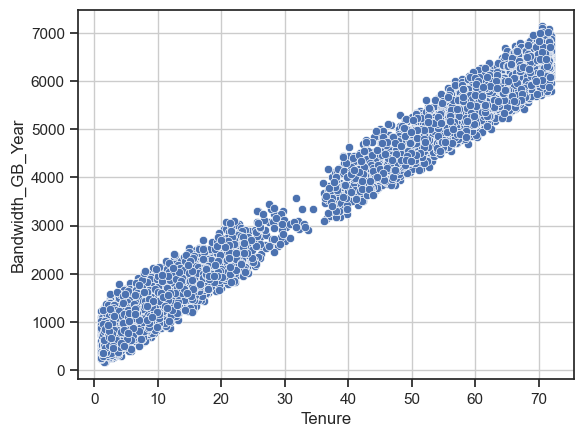

In [40]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and Bandwidth_GB_Year")
seaborn.scatterplot(x = "Tenure", y = "Bandwidth_GB_Year",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and Techie


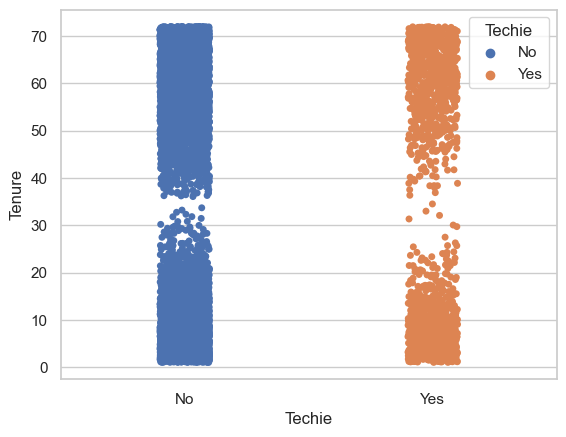

In [41]:
## Plotting the scatterplots for the categorical variables on the continuous variable Tenure
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Tenure and Techie")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Techie", y = "Tenure",  data = churned_data_linear, hue = "Techie")
plt.show()


Bivariate plot for Tenure and Multiple


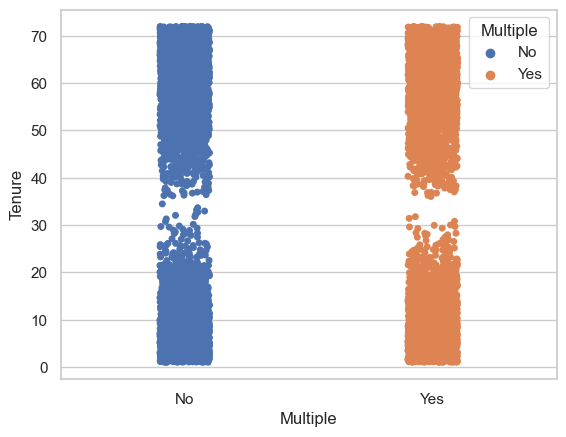

In [42]:
## Plotting the scatterplots for the categorical variables on the continuous variable Tenure
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Tenure and Multiple")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "Multiple", y = "Tenure",  data = churned_data_linear, hue = "Multiple")
plt.show()


Bivariate plot for Tenure and OnlineSecurity


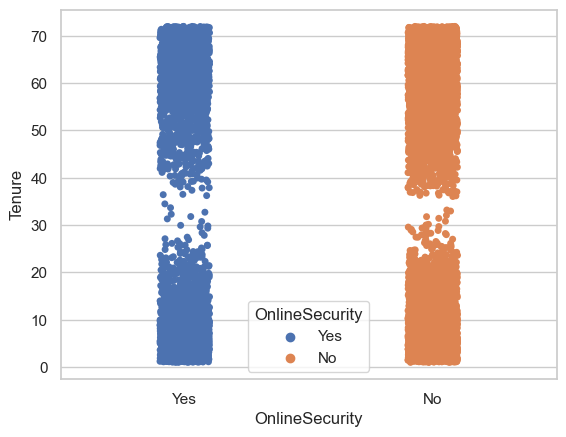

In [43]:
## Plotting the scatterplots for the categorical variables on the continuous variable Tenure
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Tenure and OnlineSecurity")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "OnlineSecurity", y = "Tenure",  data = churned_data_linear, hue = "OnlineSecurity")
plt.show()


Bivariate plot for Tenure and TechSupport


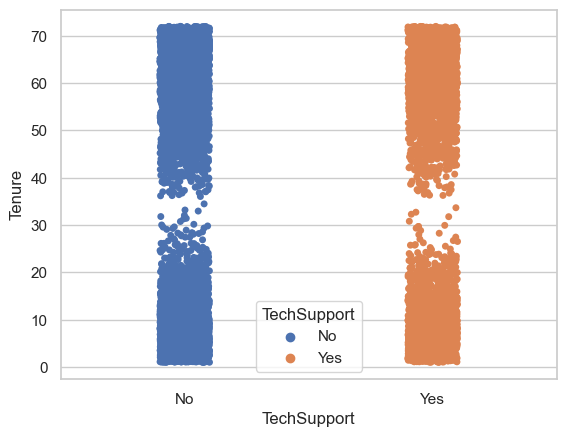

In [44]:
## Plotting the scatterplots for the categorical variables on the continuous variable Tenure
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Tenure and TechSupport")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "TechSupport", y = "Tenure",  data = churned_data_linear, hue = "TechSupport")
plt.show()


Bivariate plot for Tenure and MonthlyCharge


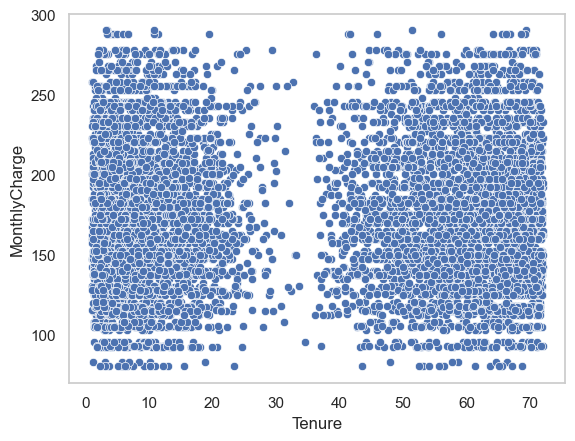

In [45]:
## Plotting the scatterplots for the continuous variables
print("Bivariate plot for Tenure and MonthlyCharge")
seaborn.scatterplot(x = "Tenure", y = "MonthlyCharge",  data = churned_data_linear)
seaborn.set(style="ticks")
plt.grid()
plt.show()

Bivariate plot for Tenure and StreamingTV


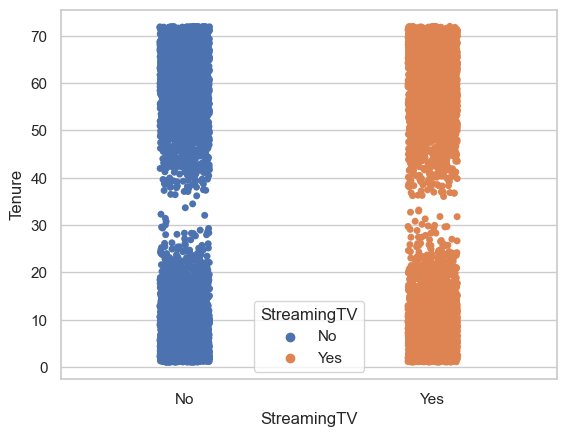

In [46]:
## Plotting the scatterplots for the categorical variables on the continuous variable Tenure
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Tenure and StreamingTV")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "StreamingTV", y = "Tenure",  data = churned_data_linear, hue = "StreamingTV")
plt.show()


In [47]:
## Replacing all Yes/No responses with an int value corresponding to Yes = 1 and No = 0.
## Per my code from D206

churned_data_linear = churned_data_linear.replace({"Yes": 1, "No": 0})
#churned_data_linear.head()

In [48]:
churned_data_linear.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D208 Regression Analysis/churn_data_linear.csv')
#print(churned_data_linear.shape)

In [49]:
## https://www.statology.org/linear-regression-python/


# reading data from the csv

# defining the variables
explanatory = churned_data_linear[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.908e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:32:22   Log-Likelihood:                -21775.
No. Observations:                9079   AIC:                         4.358e+04
Df Residuals:                    9063   BIC:                         4.370e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1832 

In [50]:
## Checking the residual standard error for the initial model

model.resid.std(ddof=explanatory.shape[1])

2.665363715142125

In [51]:
## Checking for the VIF scores to help check for multicollinearity issues
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_linear[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0             Population   1.451280
1               Children   2.104860
2                    Age   6.845781
3                 Income   3.422229
4     Outage_sec_perweek  10.645264
5               Contacts   2.009096
6                  Email  12.655100
7   Yearly_equip_failure   1.399723
8                 Techie   1.196385
9               Multiple   2.299957
10        OnlineSecurity   1.555641
11           TechSupport   1.639128
12         MonthlyCharge  21.927360
13           StreamingTV   2.653613
14     Bandwidth_GB_Year   3.309875


In [52]:
## Removing MonthlyCharge
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_linear[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0             Population   1.448038
1               Children   2.089207
2                    Age   6.556533
3                 Income   3.376816
4     Outage_sec_perweek   9.800218
5               Contacts   1.998031
6                  Email  11.249117
7   Yearly_equip_failure   1.396944
8                 Techie   1.193568
9               Multiple   1.826244
10        OnlineSecurity   1.536267
11           TechSupport   1.582699
12           StreamingTV   1.948498
13     Bandwidth_GB_Year   3.239337


In [53]:
## Removing Email
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_linear[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0             Population  1.438097
1               Children  2.064966
2                    Age  5.937597
3                 Income  3.271222
4     Outage_sec_perweek  8.037831
5               Contacts  1.975989
6   Yearly_equip_failure  1.392484
7                 Techie  1.192060
8               Multiple  1.808933
9         OnlineSecurity  1.530118
10           TechSupport  1.566204
11           StreamingTV  1.930320
12     Bandwidth_GB_Year  3.166402


In [54]:
## Removing Outage_sec_perweek
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_linear[['Population', 'Children', 'Age', 'Income',  'Contacts', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0             Population  1.422660
1               Children  2.009385
2                    Age  4.924869
3                 Income  3.081506
4               Contacts  1.925340
5   Yearly_equip_failure  1.379215
6                 Techie  1.186150
7               Multiple  1.768621
8         OnlineSecurity  1.513511
9            TechSupport  1.550236
10           StreamingTV  1.888596
11     Bandwidth_GB_Year  2.999029


In [ ]:
## VIF scores look ok. Checking the P-values

In [55]:
## The model reduction technique used will be backwards stepwise elimination. Removing Population and re-running.

# defining the variables
explanatory = churned_data_linear[['Population', 'Children', 'Age', 'Income',  'Contacts', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 6.333e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:33:29   Log-Likelihood:                -22466.
No. Observations:                9079   AIC:                         4.496e+04
Df Residuals:                    9066   BIC:                         4.505e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.3250 

In [56]:
## The model reduction technique used will be backwards stepwise elimination. Removing Population and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Income',  'Contacts', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 6.910e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:33:57   Log-Likelihood:                -22466.
No. Observations:                9079   AIC:                         4.496e+04
Df Residuals:                    9067   BIC:                         4.504e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.3251 

In [57]:
## The model reduction technique used will be backwards stepwise elimination. Removing Yearly_equip_failure and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Income',  'Contacts', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 7.601e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:34:07   Log-Likelihood:                -22466.
No. Observations:                9079   AIC:                         4.495e+04
Df Residuals:                    9068   BIC:                         4.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3193      0.12

In [58]:
## The model reduction technique used will be backwards stepwise elimination. Removing Techie and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Income',  'Contacts', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 8.446e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:34:12   Log-Likelihood:                -22467.
No. Observations:                9079   AIC:                         4.495e+04
Df Residuals:                    9069   BIC:                         4.502e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3300      0.12

In [59]:
## The model reduction technique used will be backwards stepwise elimination. Removing Contacts and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Income', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 9.502e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:34:17   Log-Likelihood:                -22467.
No. Observations:                9079   AIC:                         4.495e+04
Df Residuals:                    9070   BIC:                         4.502e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3613      0.12

In [60]:
## The model reduction technique used will be backwards stepwise elimination. Removing Income and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.086e+05
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:34:21   Log-Likelihood:                -22468.
No. Observations:                9079   AIC:                         4.495e+04
Df Residuals:                    9071   BIC:                         4.501e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.4329      0.11

In [61]:
## The model reduction technique used will be backwards stepwise elimination. Removing TechSupport and re-running.

# defining the variables
explanatory = churned_data_linear[['Children', 'Age', 'Multiple', 'OnlineSecurity', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_linear['Tenure']

# adding the constant term
explanatory = sm.add_constant(explanatory)

# performing the regression
# and fitting the model
model = sm.OLS(target, explanatory).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:34:32   Log-Likelihood:                -22470.
No. Observations:                9079   AIC:                         4.495e+04
Df Residuals:                    9072   BIC:                         4.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.4720      0.11

In [62]:
## Finding the RSE for the reduced model
## https://www.statology.org/residual-plot-python/
model.resid.std(ddof=explanatory.shape[1])

2.8758941251352694

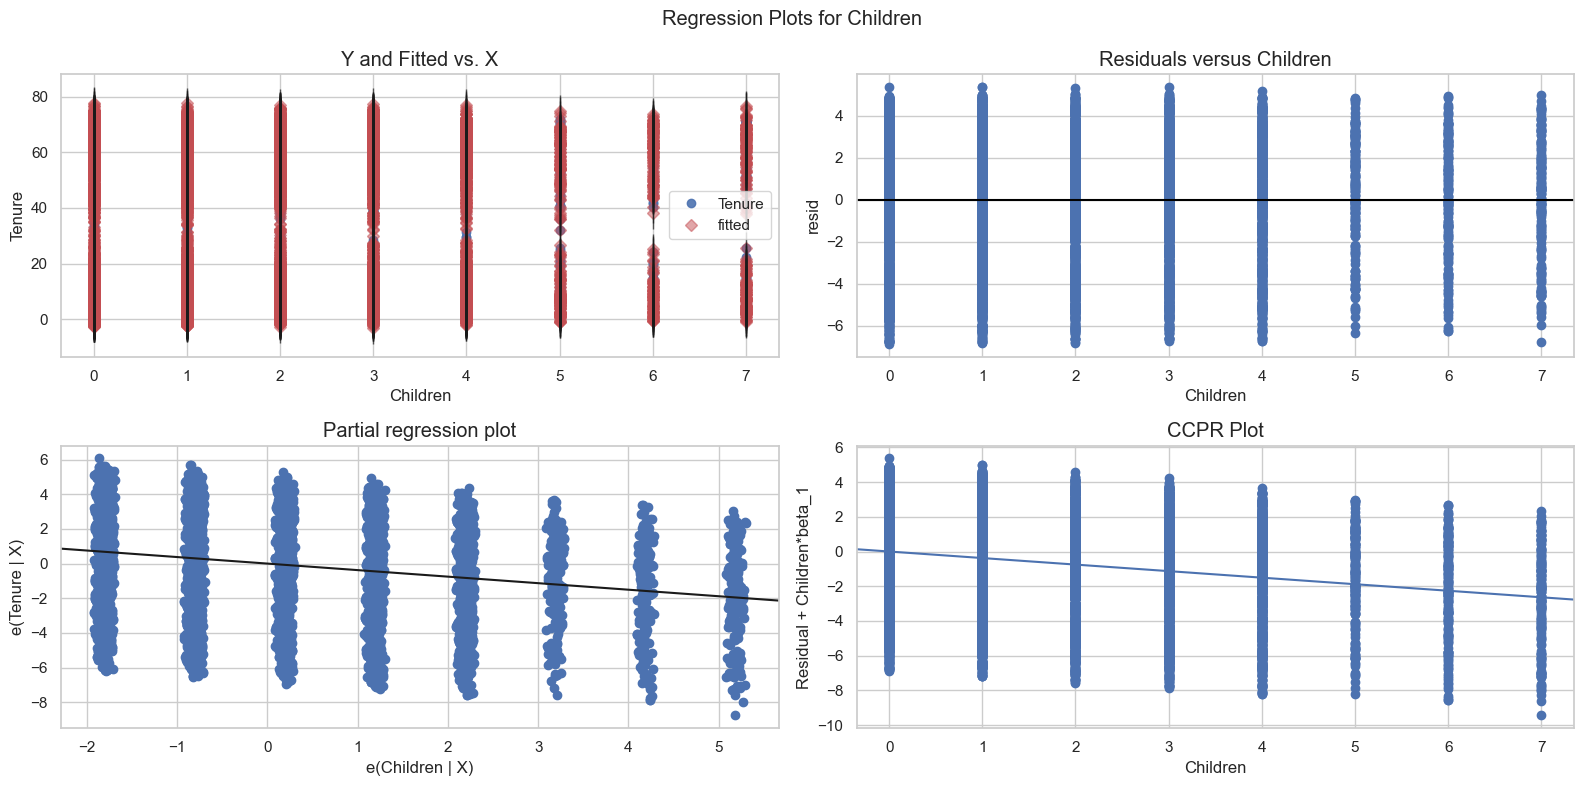

In [63]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'Children', fig=fig);

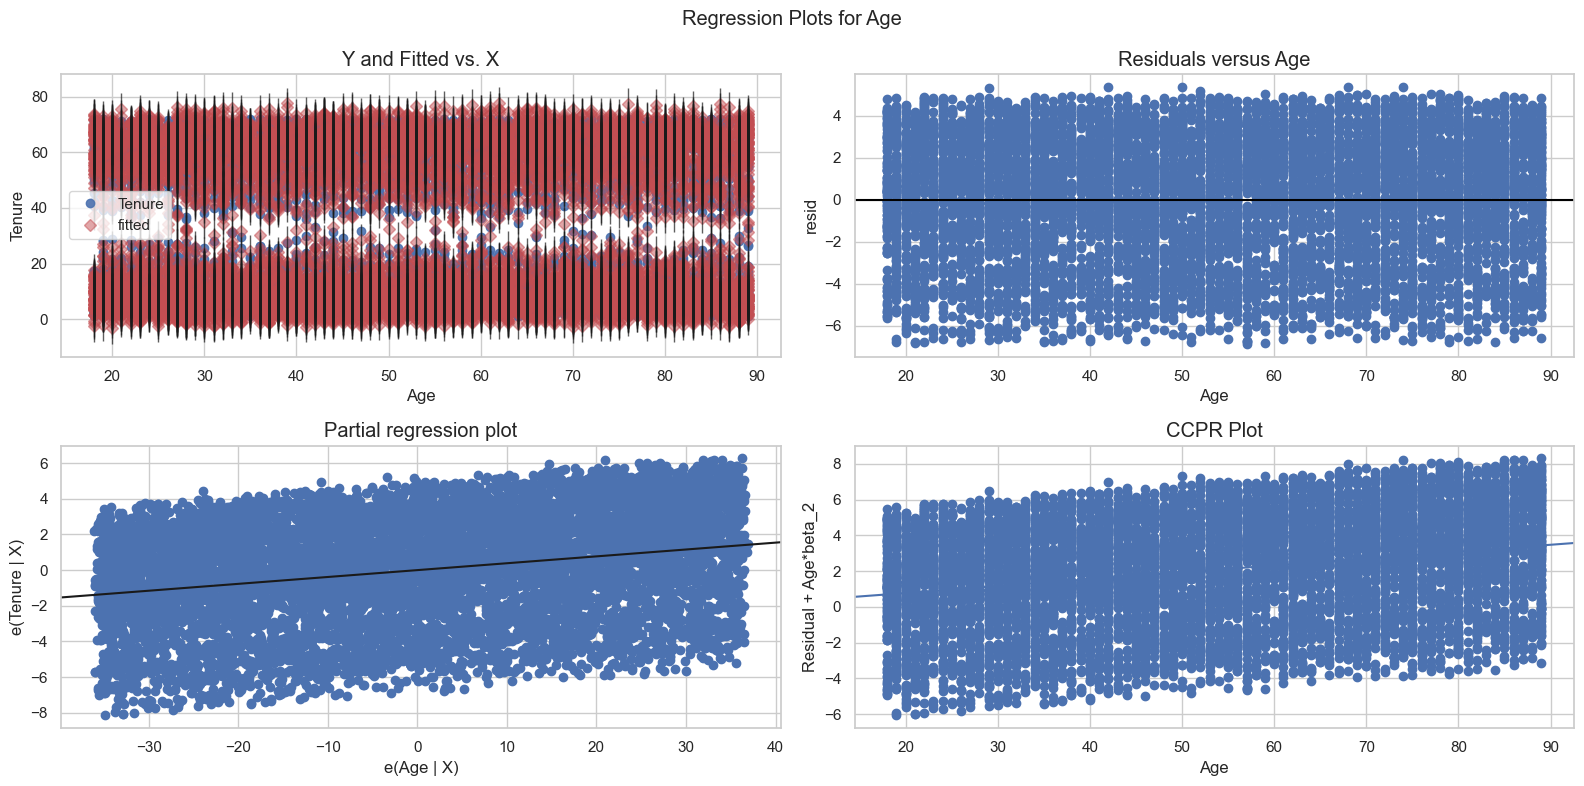

In [64]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'Age', fig=fig);

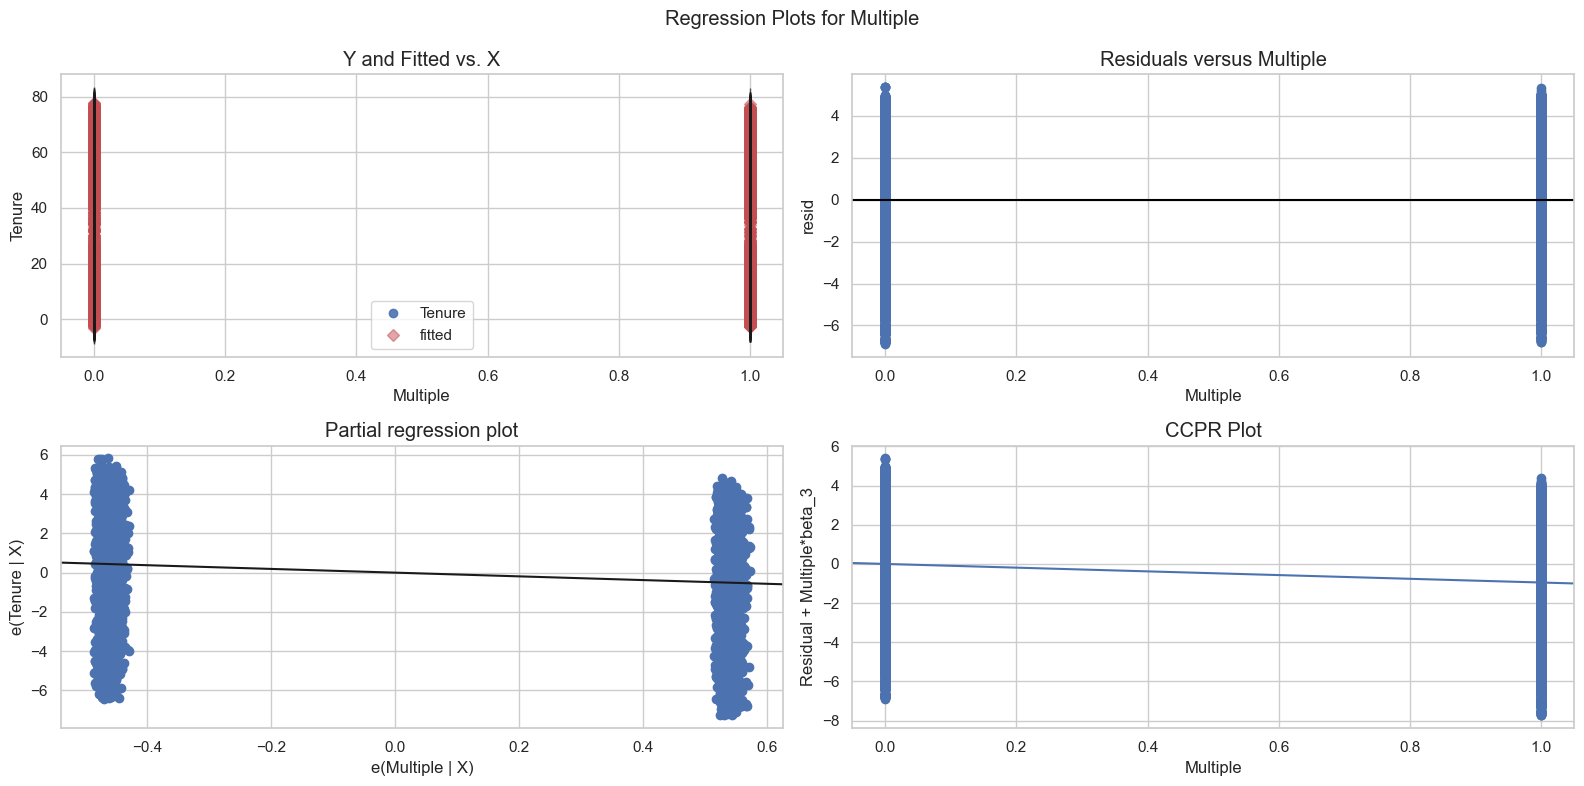

In [65]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'Multiple', fig=fig);

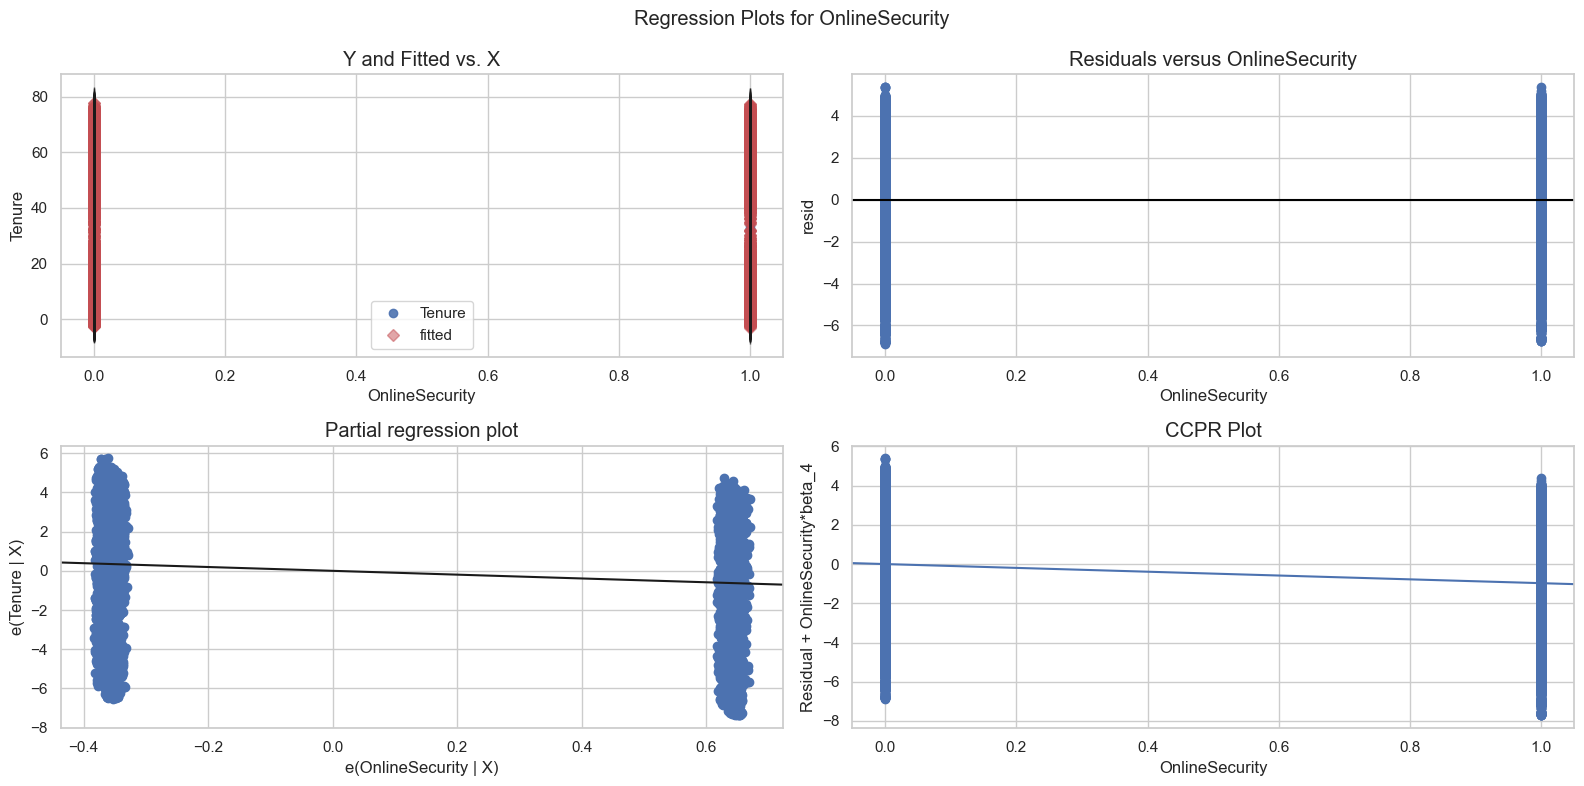

In [66]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'OnlineSecurity', fig=fig);

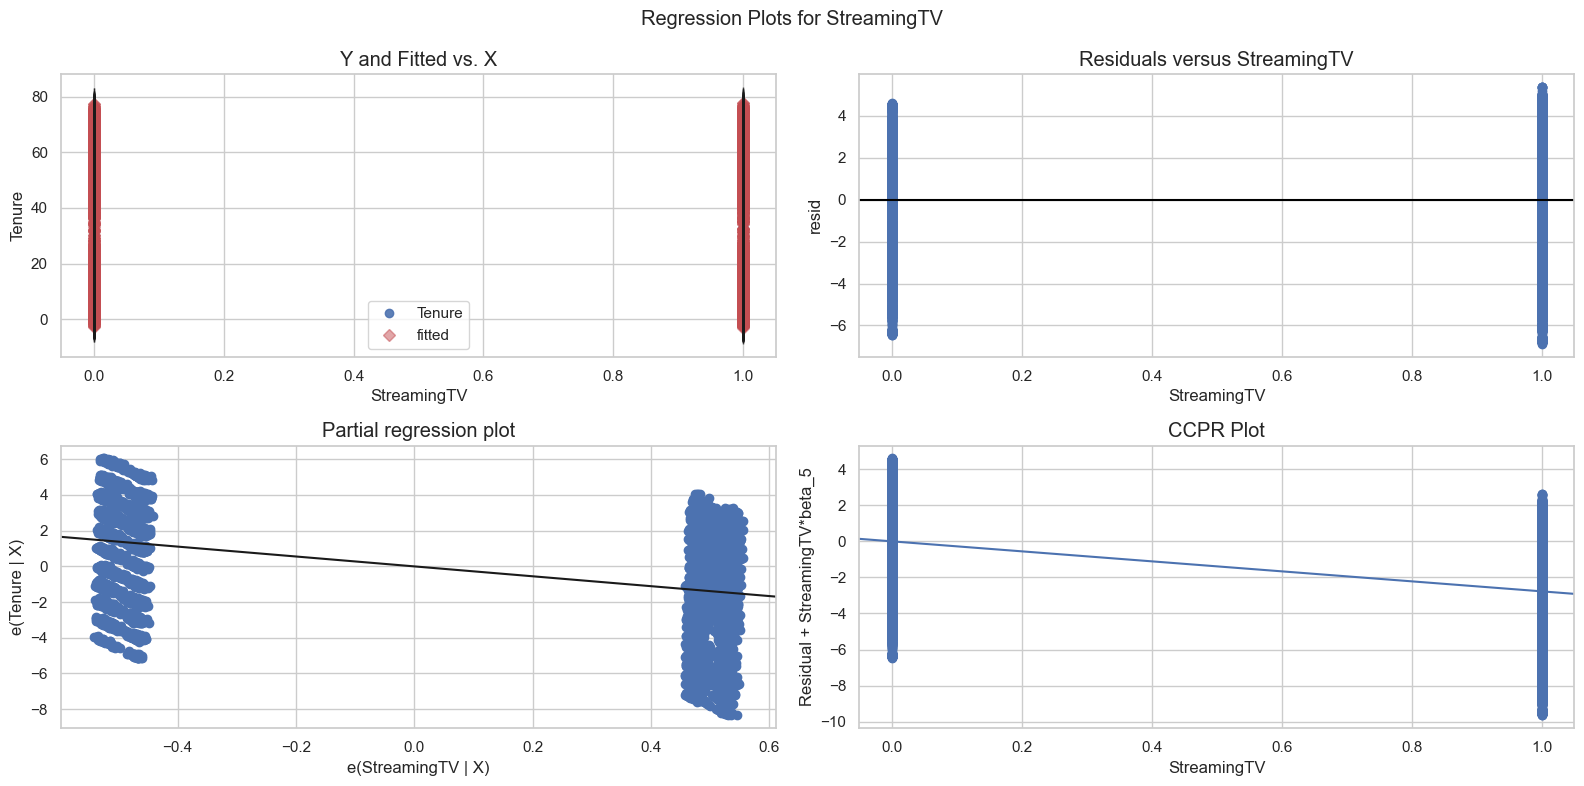

In [67]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'StreamingTV', fig=fig);

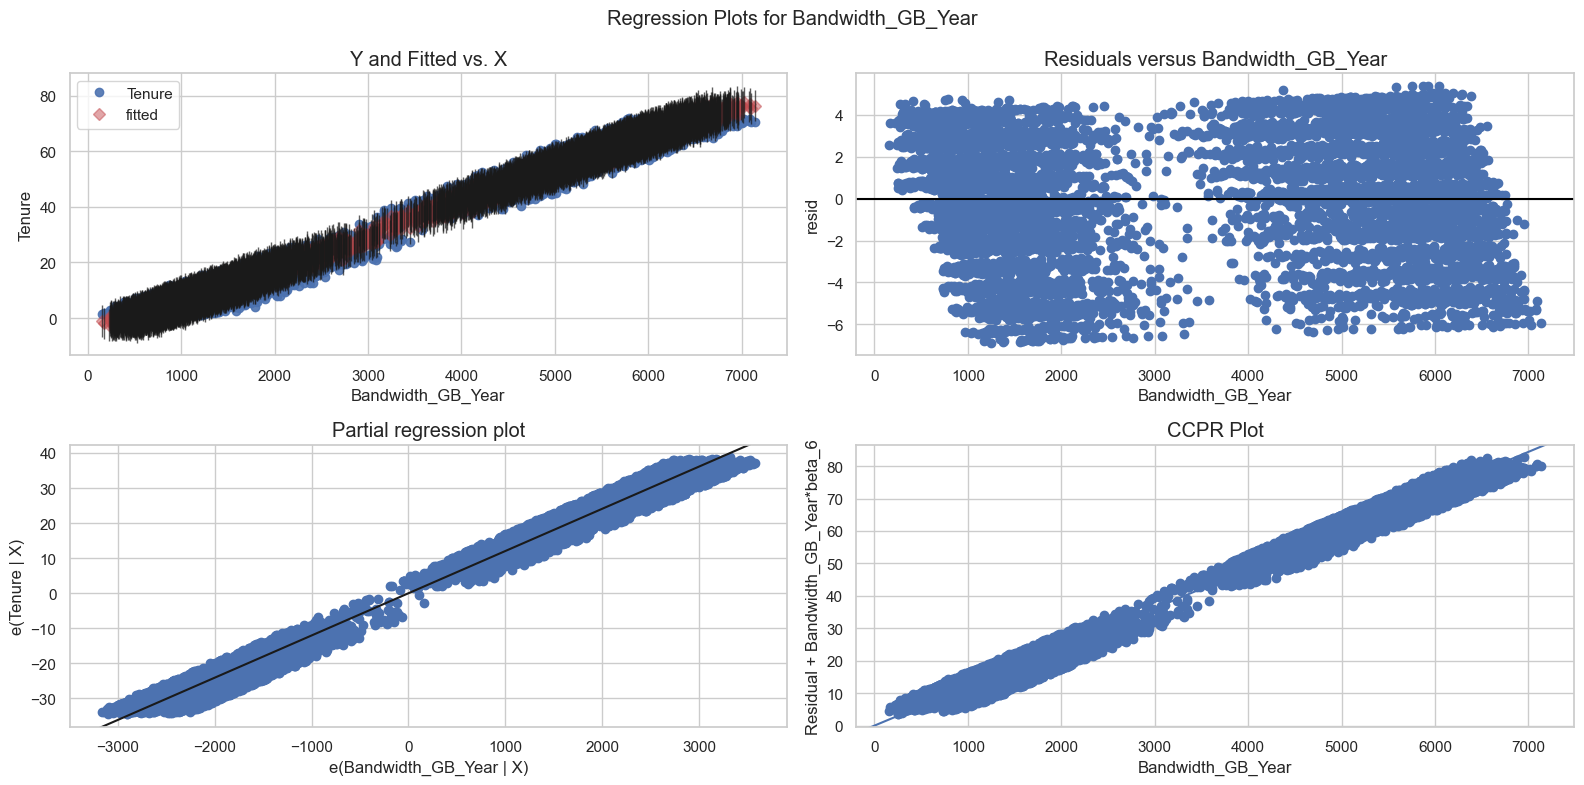

In [68]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(model, 'Bandwidth_GB_Year', fig=fig); 